<h1>Aim: Analysis of Cancer patients</h1>

<h2>Imports</h2>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

Loading data set

In [ ]:
data = pd.read_csv('cancer patient data sets.csv')

<h1>Exploratory Data Analysis</h1>

In [ ]:
data

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


<H2>Finding Dimentions of data frame</H2>

In [ ]:
data.shape

(1000, 26)

In [ ]:
data.ndim

2

<h2>Identifying the type of data</h2>

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

<h2>Removing irrevalent features</h2>

In [ ]:
data.drop(columns=['index', 'Patient Id'],inplace=True)
print(data.shape)
data.head()

(1000, 24)


,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


<h2>Finding the duplicate data</h2>

In [ ]:
data.drop_duplicates(inplace=True)
data.count()

Age                         152
Gender                      152
Air Pollution               152
Alcohol use                 152
Dust Allergy                152
OccuPational Hazards        152
Genetic Risk                152
chronic Lung Disease        152
Balanced Diet               152
Obesity                     152
Smoking                     152
Passive Smoker              152
Chest Pain                  152
Coughing of Blood           152
Fatigue                     152
Weight Loss                 152
Shortness of Breath         152
Wheezing                    152
Swallowing Difficulty       152
Clubbing of Finger Nails    152
Frequent Cold               152
Dry Cough                   152
Snoring                     152
Level                       152
dtype: int64

<h2>Finding missing or null values</h2>

In [ ]:
data.isnull().sum()

Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [ ]:
data.dtypes

Age                          int64
Gender                       int64
Air Pollution                int64
Alcohol use                  int64
Dust Allergy                 int64
OccuPational Hazards         int64
Genetic Risk                 int64
chronic Lung Disease         int64
Balanced Diet                int64
Obesity                      int64
Smoking                      int64
Passive Smoker               int64
Chest Pain                   int64
Coughing of Blood            int64
Fatigue                      int64
Weight Loss                  int64
Shortness of Breath          int64
Wheezing                     int64
Swallowing Difficulty        int64
Clubbing of Finger Nails     int64
Frequent Cold                int64
Dry Cough                    int64
Snoring                      int64
Level                       object
dtype: object

<H2> Converting Object value to integer </H2>

In [ ]:
level = []
for i in data['Level']:
    if i.lower() == 'high':
        level.append(2)
    elif i.lower() == 'medium':
        level.append(1)
    else:
        level.append(0)

data.loc[:,'Level'] = level
data

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,0
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,1
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,2
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,2
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,35,1,2,1,2,1,2,1,2,3,...,3,4,5,1,3,2,1,2,2,0
977,45,1,3,1,4,3,2,3,4,3,...,3,2,2,4,2,2,3,4,3,0
979,53,1,3,1,4,2,3,2,3,3,...,2,2,3,4,1,5,2,6,2,0
983,26,1,3,2,4,2,3,2,3,3,...,4,5,6,5,5,4,6,5,4,1


<h2>Finding outliers</h2>

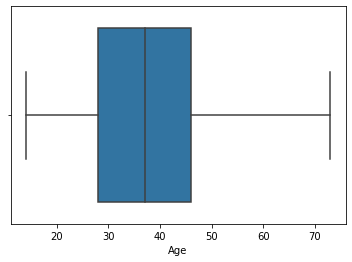

In [ ]:
sns.boxplot(x=data['Age'])

No outliers found 
This indicates that the data is balanced

<h1>Graphical EDA: plotting features against one another<br></h1>


In [ ]:
high = data[data['Level'] == 2]
medium = data[data['Level'] == 1]
low = data[data['Level'] == 0]

<h2>Bar graph and pie chart for making comparision of alcohol levels among high cancer level patients.<br></h2>

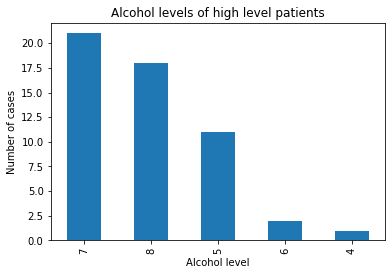

In [ ]:
high['Alcohol use'].value_counts().plot(kind='bar')
plt.xlabel('Alcohol level')
plt.ylabel('Number of cases')
plt.title('Alcohol levels of high level patients')
plt.show()

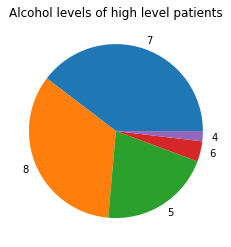

In [ ]:
country = dict(high['Alcohol use'].value_counts())
plt.pie(country.values(),labels=country.keys())
plt.title('Alcohol levels of high level patients')
plt.show()

<h2>Bar graph for making comparision among Air Pollution levels.</h2>

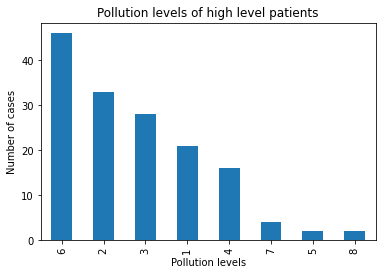

In [ ]:
data['Air Pollution'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Pollution levels of patients')
plt.xlabel('Pollution levels')
plt.ylabel('Number of cases')
plt.show()

<h2>Bar graph for making comparision of Genetic Risk</h2>

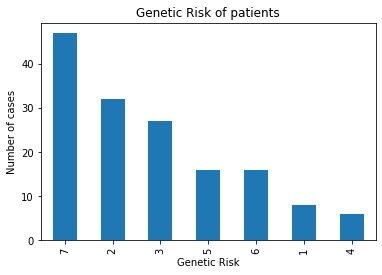

In [ ]:
data['Genetic Risk'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Genetic Risk of patients')
plt.xlabel('Genetic Risk')
plt.ylabel('Number of cases')
plt.show()

<h2>Pie chart for making comparision among Occupational hazard levels</h2>

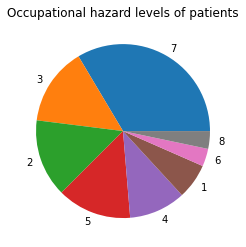

In [ ]:
genre = dict(data['OccuPational Hazards'].value_counts())
plt.pie(genre.values(),labels=genre.keys())
plt.title('Occupational hazard levels of patients')
plt.show()

<h2>Finding Correlation between fields</h2>

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
Age,1.000000,-0.054422,0.078655,0.086243,0.008677,0.007652,0.025783,0.071408,-0.008450,0.015110,...,0.120152,0.076927,0.006518,-0.089828,-0.122408,-0.048164,-0.072056,0.024778,0.001035,0.019045
Gender,-0.054422,1.000000,-0.231508,-0.233091,-0.237265,-0.228250,-0.260447,-0.266018,-0.155298,-0.165004,...,-0.144623,-0.133296,-0.142002,-0.084916,-0.007625,-0.167809,-0.023606,-0.164314,-0.130566,-0.238806
Air Pollution,0.078655,-0.231508,1.000000,0.736960,0.615913,0.605881,0.690165,0.623945,0.496917,0.585509,...,0.202325,0.288713,0.243410,0.059803,-0.100218,0.241962,0.140642,0.247631,-0.052964,0.628946
Alcohol use,0.086243,-0.233091,0.736960,1.000000,0.816946,0.869507,0.876886,0.759732,0.666956,0.667210,...,0.230836,0.231882,0.432130,0.199140,-0.144582,0.429550,0.177573,0.237570,0.121772,0.736357
Dust Allergy,0.008677,-0.237265,0.615913,0.816946,1.000000,0.835541,0.776458,0.629307,0.657294,0.701089,...,0.331880,0.348295,0.512364,0.300813,-0.001859,0.365988,0.239689,0.314666,0.049892,0.726268
OccuPational Hazards,0.007652,-0.228250,0.605881,0.869507,0.835541,1.000000,0.885225,0.857867,0.715622,0.736990,...,0.267658,0.223186,0.356308,0.179531,-0.039119,0.382604,0.081565,0.195024,0.016968,0.678568
Genetic Risk,0.025783,-0.260447,0.690165,0.876886,0.776458,0.885225,1.000000,0.850901,0.695329,0.747868,...,0.229213,0.328643,0.450340,0.205595,-0.078056,0.369903,0.080987,0.196722,-0.030366,0.718599
chronic Lung Disease,0.071408,-0.266018,0.623945,0.759732,0.629307,0.857867,0.850901,1.000000,0.636910,0.625587,...,0.247468,0.169197,0.177361,0.078285,-0.022046,0.313717,0.019490,0.133634,0.063765,0.634895
Balanced Diet,-0.008450,-0.155298,0.496917,0.666956,0.657294,0.715622,0.695329,0.636910,1.000000,0.722903,...,0.413034,0.071801,0.363592,0.089966,0.026972,0.078539,0.267694,0.349561,0.153940,0.728610
Obesity,0.015110,-0.165004,0.585509,0.667210,0.701089,0.736990,0.747868,0.625587,0.722903,1.000000,...,0.526309,0.352013,0.413883,0.076815,0.062211,0.143357,0.254706,0.196647,0.010074,0.812743


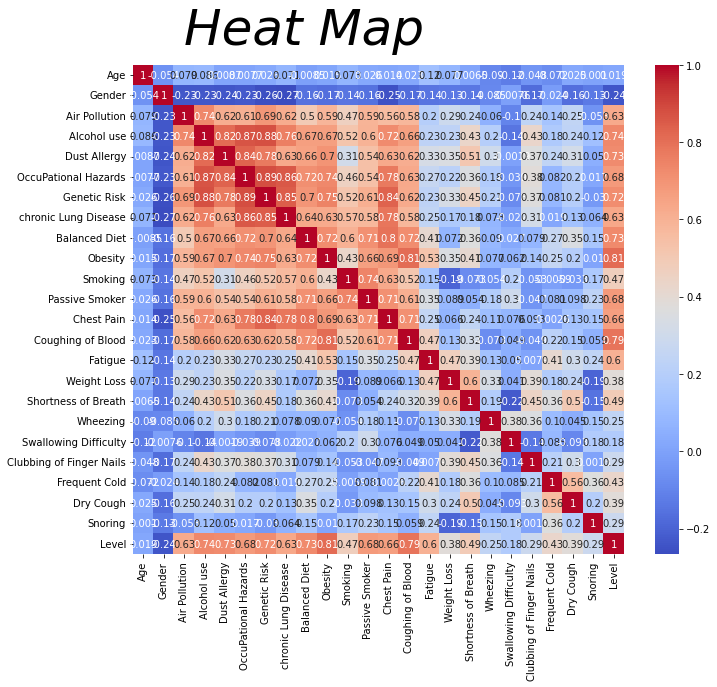

In [ ]:
plt.figure(figsize=(11,9))
c= data.corr(method='pearson')
sns.heatmap(c,cmap='coolwarm',annot=True)

plt.text(2.5,-1, "Heat Map", fontsize = 50, color='Black', fontstyle='italic')
c

<h3> Findings </h3>
1. There is there is high correlation between Cancer level and Obesity: +81%<br>
Thus we can conclude what Obese people are more prone to cancer.<br>
2. There is there is high correlation between Blood cough and Cancer levels: +79%<br>
We can conclude that Blood cough is a sigh of Cancer.<br>
3. There is there is high correlation between Alcohol Usage and cancer levels: +74%<br>
We can conclude that consumption of alcohol is one of the main reasons for cancer.<br>
4. There is there is high correlation between Genetic Risk and cancer levels: +72%<br>
We can conclude that it can be passed on genetically.<br>